<a href="https://colab.research.google.com/github/SangamSilwal/Machine-learning-Series/blob/main/Day_6_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bining and Binarization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# KBinDiscretizer is used for Bining and Binerization
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv("/content/train.csv",usecols=['Age','Fare','Survived'])
df.dropna(inplace=True)
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
X = df.iloc[:,1:]
y=df.iloc[:,0]

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


# Checking Accuracy Without applying any type of Binerization

In [7]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.6293706293706294

In [8]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.6344874804381847)

# Using Discretelization

Checking strategy="Quantile"

In [22]:
kbin_age = KBinsDiscretizer(n_bins=15,encode="ordinal",strategy="quantile")
kbin_fare = KBinsDiscretizer(n_bins=15,encode="ordinal",strategy="quantile")

In [23]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [24]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [25]:
print(trf.named_transformers_,"\n")
print(trf.named_transformers_['first'],"\n")
print(trf.named_transformers_['first'].n_bins_,"\n")
print(trf.named_transformers_['first'].bin_edges_,"\n")

{'first': KBinsDiscretizer(encode='ordinal', n_bins=15), 'second': KBinsDiscretizer(encode='ordinal', n_bins=15)} 

KBinsDiscretizer(encode='ordinal', n_bins=15) 

[15] 

[array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
        32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ] 



In [26]:
output = pd.DataFrame({
    "age":X_train['Age'],
    "age_trf":X_train_trf[:,0],
    "fare":X_train['Fare'],
    "fare_trf":X_train_trf[:,1]
})
output


,age,age_trf,fare,fare_trf
328,31.0,8.0,20.5250,8.0
73,26.0,6.0,14.4542,7.0
253,30.0,8.0,16.1000,7.0
719,33.0,9.0,7.7750,2.0
666,25.0,6.0,13.0000,6.0
...,...,...,...,...
92,46.0,12.0,61.1750,12.0
134,25.0,6.0,13.0000,6.0
337,41.0,11.0,134.5000,14.0
548,33.0,9.0,20.5250,8.0


In [27]:
output['age_labels'] = pd.cut(x=output['age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=output['fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())
output

,age,age_trf,fare,fare_trf,age_labels,fare_labels
328,31.0,8.0,20.5250,8.0,"(30.0, 32.0]","(18.75, 26.0]"
73,26.0,6.0,14.4542,7.0,"(25.0, 28.0]","(13.0, 14.454]"
253,30.0,8.0,16.1000,7.0,"(28.0, 30.0]","(14.454, 18.75]"
719,33.0,9.0,7.7750,2.0,"(32.0, 35.0]","(7.25, 7.775]"
666,25.0,6.0,13.0000,6.0,"(23.0, 25.0]","(10.5, 13.0]"
...,...,...,...,...,...,...
92,46.0,12.0,61.1750,12.0,"(42.0, 47.0]","(51.479, 76.292]"
134,25.0,6.0,13.0000,6.0,"(23.0, 25.0]","(10.5, 13.0]"
337,41.0,11.0,134.5000,14.0,"(38.0, 42.0]","(108.9, 512.329]"
548,33.0,9.0,20.5250,8.0,"(32.0, 35.0]","(18.75, 26.0]"


In [28]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [29]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [30]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

np.float64(0.6723004694835681)

In [37]:
def discretize(bins, strategy):
  kbin_age = KBinsDiscretizer(n_bins=bins,encode="ordinal",strategy=strategy)
  kbin_fare = KBinsDiscretizer(n_bins=bins,encode="ordinal",strategy=strategy)

  trf = ColumnTransformer([
      ('first',kbin_age,[0]),
      ('second',kbin_fare,[1])
  ])

  X_trf = trf.fit_transform(X)
  print("DecisionTreeClassifier accuracy Score: ",np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy')))

  plt.figure(figsize=(14,4))
  plt.subplot(1,2,1)
  plt.hist(X['Age'])
  plt.title("Before")
  plt.subplot(1,2,2)
  plt.hist(X_trf[:,0],color="red")
  plt.title("After")
  plt.show()

DecisionTreeClassifier accuracy Score:  0.682140062597809


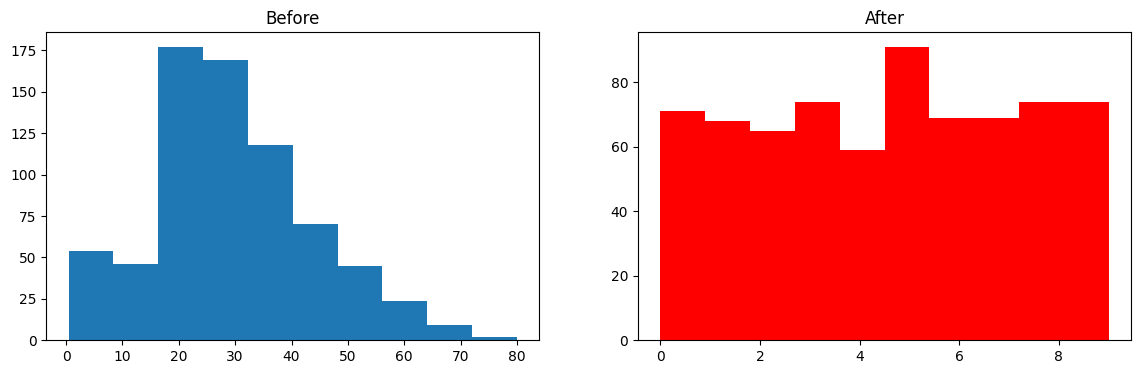

In [38]:
discretize(10,"quantile")